In [1]:
import numpy as np
import pandas as pd
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv('./combined_data.csv')
df, validation = train_test_split(data, test_size=0.2, random_state=1)

In [3]:
pd.set_option('display.max_columns', None)
df.head(2)

,Landslide,Aspect,Curvature,Earthquake,Elevation,Flow,Lithology,NDVI,NDWI,Plan,Precipitation,Profile,Slope,Aspect_mm,Curvature_mm,Earthquake_mm,Elevation_mm,Flow_mm,Lithology_mm,NDVI_mm,NDWI_mm,Plan_mm,Precipitation_mm,Profile_mm,Slope_mm,Aspect_ss,Curvature_ss,Earthquake_ss,Elevation_ss,Flow_ss,Lithology_ss,NDVI_ss,NDWI_ss,Plan_ss,Precipitation_ss,Profile_ss,Slope_ss,Aspect_freq,Curvature_freq,Earthquake_freq,Elevation_freq,Flow_freq,Lithology_freq,NDVI_freq,NDWI_freq,Plan_freq,Precipitation_freq,Profile_freq,Slope_freq,Aspect_mean,Curvature_mean,Earthquake_mean,Elevation_mean,Flow_mean,Lithology_mean,NDVI_mean,NDWI_mean,Plan_mean,Precipitation_mean,Profile_mean,Slope_mean
874,1,3,5,3,3,2,2,4,2,4,5,1,4,0.5,1.0,1.0,0.50,0.25,0.2,0.75,0.25,0.75,1.0,0.0,0.75,0.033092,1.839765,1.340764,0.453666,-0.304150,0.035930,0.772640,-0.595652,0.889997,0.880664,-2.177302,0.995294,0.381188,0.086634,0.280528,0.216172,0.443069,0.066832,0.29703,0.293729,0.257426,0.444719,0.050330,0.238449,0.692641,0.466667,0.552941,0.500000,0.659218,0.876543,0.597222,0.629213,0.487179,0.606679,0.508197,0.567474
395,0,5,3,2,2,4,1,1,5,2,3,3,4,1.0,0.5,0.5,0.25,0.75,0.0,0.00,1.00,0.25,0.5,0.5,0.75,1.776916,0.020267,-0.152808,-0.351375,1.494044,-0.666437,-1.649187,1.713294,-1.002418,-0.603849,-0.252510,0.995294,0.111386,0.345710,0.541254,0.254125,0.086634,0.624587,0.14604,0.129538,0.212871,0.144389,0.351485,0.238449,0.162963,0.431981,0.560976,0.448052,0.123810,0.505945,0.316384,0.280255,0.511628,0.451429,0.382629,0.567474


In [4]:
pd.set_option('display.max_columns', None)
df.head(2)

,Landslide,Aspect,Curvature,Earthquake,Elevation,Flow,Lithology,NDVI,NDWI,Plan,Precipitation,Profile,Slope,Aspect_mm,Curvature_mm,Earthquake_mm,Elevation_mm,Flow_mm,Lithology_mm,NDVI_mm,NDWI_mm,Plan_mm,Precipitation_mm,Profile_mm,Slope_mm,Aspect_ss,Curvature_ss,Earthquake_ss,Elevation_ss,Flow_ss,Lithology_ss,NDVI_ss,NDWI_ss,Plan_ss,Precipitation_ss,Profile_ss,Slope_ss,Aspect_freq,Curvature_freq,Earthquake_freq,Elevation_freq,Flow_freq,Lithology_freq,NDVI_freq,NDWI_freq,Plan_freq,Precipitation_freq,Profile_freq,Slope_freq,Aspect_mean,Curvature_mean,Earthquake_mean,Elevation_mean,Flow_mean,Lithology_mean,NDVI_mean,NDWI_mean,Plan_mean,Precipitation_mean,Profile_mean,Slope_mean
874,1,3,5,3,3,2,2,4,2,4,5,1,4,0.5,1.0,1.0,0.50,0.25,0.2,0.75,0.25,0.75,1.0,0.0,0.75,0.033092,1.839765,1.340764,0.453666,-0.304150,0.035930,0.772640,-0.595652,0.889997,0.880664,-2.177302,0.995294,0.381188,0.086634,0.280528,0.216172,0.443069,0.066832,0.29703,0.293729,0.257426,0.444719,0.050330,0.238449,0.692641,0.466667,0.552941,0.500000,0.659218,0.876543,0.597222,0.629213,0.487179,0.606679,0.508197,0.567474
395,0,5,3,2,2,4,1,1,5,2,3,3,4,1.0,0.5,0.5,0.25,0.75,0.0,0.00,1.00,0.25,0.5,0.5,0.75,1.776916,0.020267,-0.152808,-0.351375,1.494044,-0.666437,-1.649187,1.713294,-1.002418,-0.603849,-0.252510,0.995294,0.111386,0.345710,0.541254,0.254125,0.086634,0.624587,0.14604,0.129538,0.212871,0.144389,0.351485,0.238449,0.162963,0.431981,0.560976,0.448052,0.123810,0.505945,0.316384,0.280255,0.511628,0.451429,0.382629,0.567474


In [5]:
df.columns

Index(['Landslide', 'Aspect', 'Curvature', 'Earthquake', 'Elevation', 'Flow',
       'Lithology', 'NDVI', 'NDWI', 'Plan', 'Precipitation', 'Profile',
       'Slope', 'Aspect_mm', 'Curvature_mm', 'Earthquake_mm', 'Elevation_mm',
       'Flow_mm', 'Lithology_mm', 'NDVI_mm', 'NDWI_mm', 'Plan_mm',
       'Precipitation_mm', 'Profile_mm', 'Slope_mm', 'Aspect_ss',
       'Curvature_ss', 'Earthquake_ss', 'Elevation_ss', 'Flow_ss',
       'Lithology_ss', 'NDVI_ss', 'NDWI_ss', 'Plan_ss', 'Precipitation_ss',
       'Profile_ss', 'Slope_ss', 'Aspect_freq', 'Curvature_freq',
       'Earthquake_freq', 'Elevation_freq', 'Flow_freq', 'Lithology_freq',
       'NDVI_freq', 'NDWI_freq', 'Plan_freq', 'Precipitation_freq',
       'Profile_freq', 'Slope_freq', 'Aspect_mean', 'Curvature_mean',
       'Earthquake_mean', 'Elevation_mean', 'Flow_mean', 'Lithology_mean',
       'NDVI_mean', 'NDWI_mean', 'Plan_mean', 'Precipitation_mean',
       'Profile_mean', 'Slope_mean'],
      dtype='object')

In [6]:
X = df.drop(columns=['Landslide'])
y = df['Landslide']
X_val = validation.drop(columns=['Landslide'])
y_val = validation['Landslide']

In [7]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [8]:
lasso = Lasso(alpha=0.01)
lasso.fit(X_scaled, y)

Lasso(alpha=0.01)

In [9]:
selected_features = X.columns[lasso.coef_ != 0]

In [10]:
selected_features

Index(['Flow', 'NDVI', 'Precipitation', 'Slope', 'Flow_mm', 'NDVI_mm',
       'Precipitation_mm', 'Slope_mm', 'Flow_ss', 'NDVI_ss',
       'Precipitation_ss', 'Curvature_freq', 'Earthquake_freq', 'NDVI_freq',
       'Aspect_mean', 'Elevation_mean', 'Flow_mean', 'Lithology_mean',
       'NDWI_mean', 'Plan_mean', 'Precipitation_mean', 'Profile_mean',
       'Slope_mean'],
      dtype='object')

In [11]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest model using all features
rf_all = RandomForestClassifier(random_state=1)
rf_all.fit(X, y)
y_pred_all = rf_all.predict(X_val)
accuracy_rf_all = accuracy_score(y_val, y_pred_all)

# Train Random Forest model using selected features
rf_sf = RandomForestClassifier(random_state=1)
rf_sf.fit(X[selected_features], y)
y_pred_sf = rf_sf.predict(X_val[selected_features])
accuracy_rf_sf = accuracy_score(y_val, y_pred_sf)

# Compare accuracies
print("Accuracy with all features (Random Forest):", accuracy_rf_all)
print("Accuracy with selected features (Random Forest):", accuracy_rf_sf)

Accuracy with all features (Random Forest): 0.8024691358024691
Accuracy with selected features (Random Forest): 0.7530864197530864


## Result:
I tried different values of alpha from 0.001 to 0.1. The Lasso feature selection with an alpha value of 0.01 slightly reduces the feature space but the accuracy remained the same, so this means that all features in the original data are important to the prediction. Although with some random seeds the accuracy improved with alpha = 0.02, this was not significant enough to drop any features.

In [12]:
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt

In [13]:
features = list(df.columns.values.tolist())
df_feat = df.iloc[:, :-1]
features_wo = list(df_feat.columns.values.tolist())

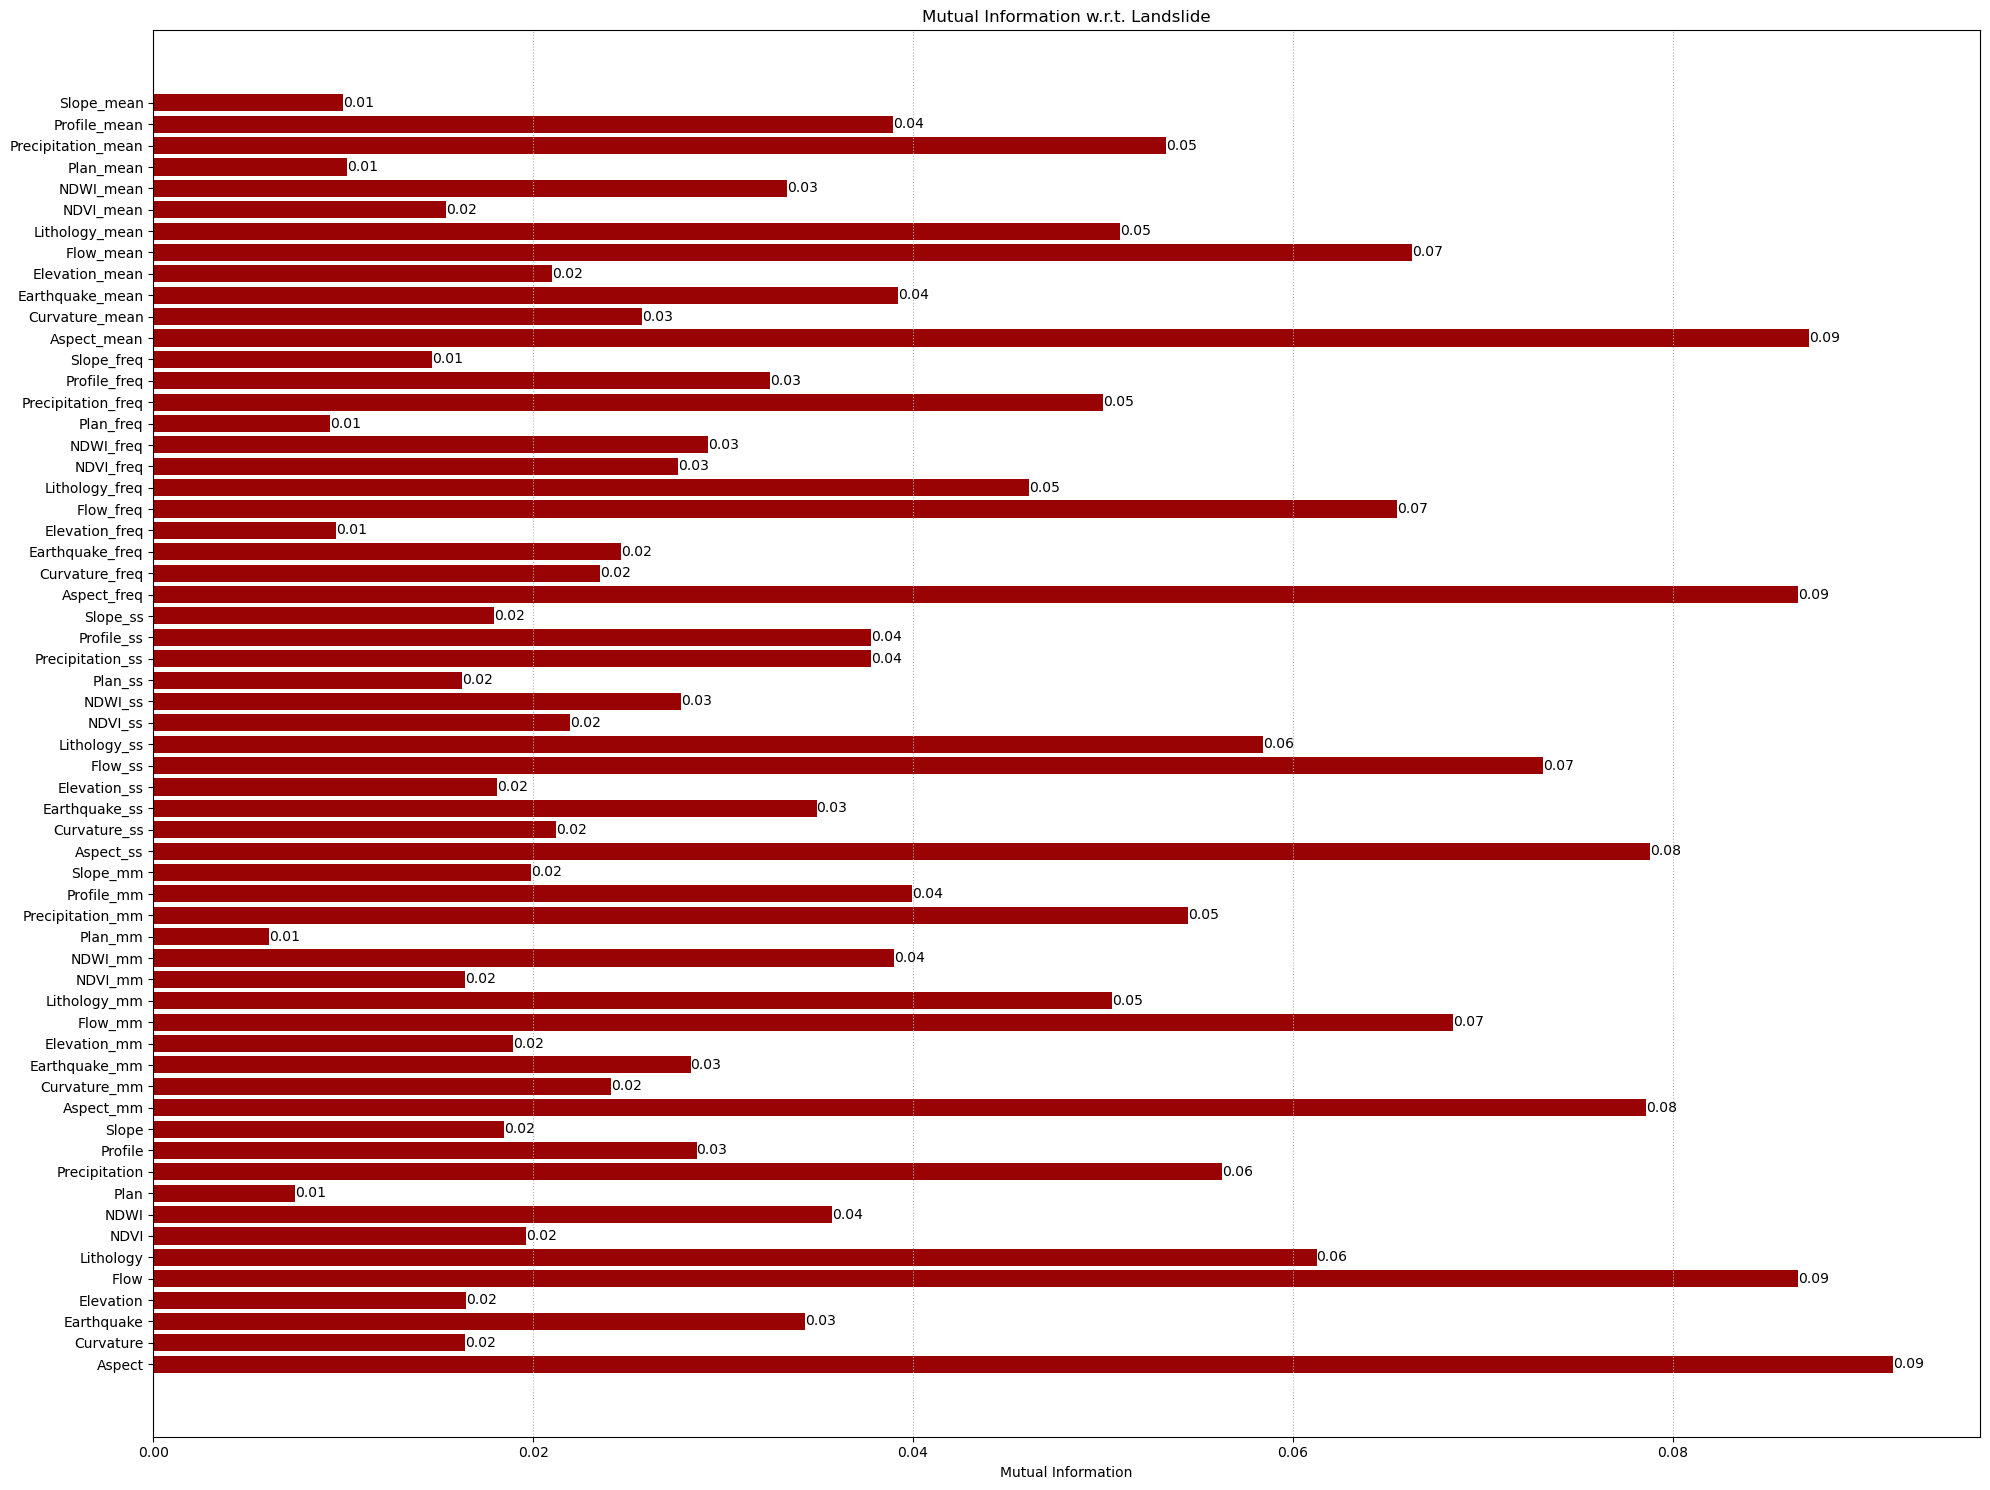

In [14]:
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_classif

features_wo = [feature for feature in df.columns if feature != "Landslide"]

MI = mutual_info_classif(df[features_wo], df["Landslide"], n_neighbors=20, random_state=42)

plt.figure(figsize=(20, 15))
bars = plt.barh(y=features_wo, width=MI, color="#990303")

for bar, mi_value in zip(bars, MI):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, round(mi_value, 2), 
             va='center', ha='left')

plt.title("Mutual Information w.r.t. Landslide")
plt.xlabel("Mutual Information")
plt.gca().xaxis.grid(True, linestyle=':')
plt.tight_layout()

plt.show()

In [15]:
lasso_features = ['Flow', 'NDVI', 'Precipitation', 'Slope', 'Flow_mm', 'NDVI_mm',
       'Precipitation_mm', 'Slope_mm', 'Flow_ss', 'NDVI_ss',
       'Precipitation_ss', 'Curvature_freq', 'Earthquake_freq', 'NDVI_freq',
       'Aspect_mean', 'Elevation_mean', 'Flow_mean', 'Lithology_mean',
       'NDWI_mean', 'Plan_mean', 'Precipitation_mean', 'Profile_mean',
       'Slope_mean']

In [16]:
combined_selected_features = ['Flow_mean', 'Aspect_mean', 'Lithology_ss', 'NDWI_mm', 'Precipitation', 'Earthquake_mean', 'Profile_mean', 'Plan_mean', 'Elevation', 'Curvature_freq', 'NDVI', 'Slope']

In [17]:
original_features = ['Landslide', 'Aspect', 'Curvature', 'Earthquake', 'Elevation', 'Flow', 'Lithology', 'NDVI', 'NDWI', 'Plan', 'Precipitation', 'Profile']

In [18]:
from sklearn.metrics import classification_report

rf_all = RandomForestClassifier(random_state=1)
rf_all.fit(X, y)
y_pred_all = rf_all.predict(X_val)

rf_orig = RandomForestClassifier(random_state=1)
rf_orig.fit(X, y)
y_pred_orig = rf_orig.predict(X_val)

rf_cf = RandomForestClassifier(random_state=1)
rf_cf.fit(X[combined_selected_features], y)
y_pred_cf = rf_cf.predict(X_val[combined_selected_features])

print("Classification Report with all versions of features:")
print(classification_report(y_val, y_pred_all))

print("Classification Report with original features:")
print(classification_report(y_val, y_pred_orig))

print("\nClassification Report with selected features:")
print(classification_report(y_val, y_pred_cf))

Classification Report with all versions of features:
              precision    recall  f1-score   support

           0       0.81      0.82      0.81       128
           1       0.80      0.78      0.79       115

    accuracy                           0.80       243
   macro avg       0.80      0.80      0.80       243
weighted avg       0.80      0.80      0.80       243

Classification Report with original features:
              precision    recall  f1-score   support

           0       0.81      0.82      0.81       128
           1       0.80      0.78      0.79       115

    accuracy                           0.80       243
   macro avg       0.80      0.80      0.80       243
weighted avg       0.80      0.80      0.80       243


Classification Report with selected features:
              precision    recall  f1-score   support

           0       0.82      0.80      0.81       128
           1       0.78      0.81      0.79       115

    accuracy                        

#### Outcome
The feature selection was about the same if not worse than the original models so we decided to stick to the original dataset.